In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn as sk
import tensorflow as tf
import re

df = pd.read_csv('Datasets/audi_challenge.csv')


df.head()




,index,car description,price (euro),age (year),fuel type,transmission,bodystyle,car model,mileage (km)
0,0,"Audi A3 1.8 TFSI 160pk S tronic S-Line (Xenon,...",13650.0,9,Petrol,Automatic,Cabriolet,A3,115174
1,1,Audi A7 Sportback 55 TFSI 340pk Quattro Pro Li...,91800.0,1,Petrol,Automatic,Hatchback,A7,8527
2,2,Audi A3 1.6 TDI 110 PK S-Line | Xenon | Bang &...,26150.0,3,Diesel,Manual,Sedan,A3,82345
3,3,Audi A8 Lang 3.0 TDI 258pk Tiptronic Quattro P...,50900.0,4,Diesel,Automatic,Sedan,A8,144772
4,4,Audi TT 1.8 TFSI Coupe Pro Line -MMI+/Xenon/St...,37700.0,2,Petrol,Manual,Coupe,TT,16652


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7922 entries, 0 to 7921
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            7922 non-null   int64  
 1   car description  7922 non-null   object 
 2   price (euro)     7122 non-null   float64
 3   age (year)       7922 non-null   int64  
 4   fuel type        7922 non-null   object 
 5   transmission     7922 non-null   object 
 6   bodystyle        7922 non-null   object 
 7   car model        7922 non-null   object 
 8   mileage (km)     7922 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 557.1+ KB


In [163]:
power_list = []
displacement_list = []
for i in df['car description']:
    text = i.lower()
    match_hp = re.search(r'(\d+)\s?pk', text)
    if match_hp:
        horsepower = int(match_hp.group(1))
    else:
        match_hp = re.search(r'(\d+)\s?hp', text)
        if match_hp:
            horsepower = int(match_hp.group(1))
        else:
            horsepower = np.nan
    power_list.append(horsepower)
    match_disp = re.search(r'(\d+(?:\.\d+)?)\s*(?=t[f]?si|tdi)', text)
    if match_disp:
        try:
            displacement = float(match_disp.group(1))
        except ValueError:
            displacement = None
    displacement_list.append(displacement)

df['Horsepower'] = power_list
df['Displacement'] = displacement_list
df['hp/litre'] = df['Horsepower'] / df['Displacement']

In [164]:
del df['car description']
df.head()

,index,price (euro),age (year),fuel type,transmission,bodystyle,car model,mileage (km),Horsepower,Displacement,hp/litre
0,0,13650.0,9,Petrol,Automatic,Cabriolet,A3,115174,160.0,1.8,88.888889
1,1,91800.0,1,Petrol,Automatic,Hatchback,A7,8527,340.0,55.0,6.181818
2,2,26150.0,3,Diesel,Manual,Sedan,A3,82345,110.0,1.6,68.750000
3,3,50900.0,4,Diesel,Automatic,Sedan,A8,144772,258.0,3.0,86.000000
4,4,37700.0,2,Petrol,Manual,Coupe,TT,16652,NaN,1.8,NaN


In [165]:
df.describe()

,index,price (euro),age (year),mileage (km),Horsepower,Displacement,hp/litre
count,7922.000000,7122.000000,7922.000000,7922.000000,3678.000000,7922.000000,3678.000000
mean,3960.500000,33214.490312,5.381343,87390.918329,184.478793,5.363721,89.107133
std,2287.028749,26942.203661,4.596769,81287.340268,87.098886,10.986759,47.996683
min,0.000000,350.000000,0.000000,0.000000,75.000000,1.000000,1.727273
25%,1980.250000,15700.000000,1.000000,10586.250000,122.000000,1.400000,75.000000
50%,3960.500000,26150.000000,5.000000,74598.500000,150.000000,2.000000,95.000000
75%,5940.750000,41850.000000,8.000000,142303.500000,204.000000,2.000000,107.142857
max,7921.000000,324350.000000,56.000000,567483.000000,776.000000,55.000000,610.000000


In [166]:
df["km/year"] = df["mileage (km)"]/df["age (year)"]
df.fillna(0, inplace=True)

In [167]:
df_train = df.iloc[:7122,:]
df_test = df.iloc[7122:,:]

<Axes: >

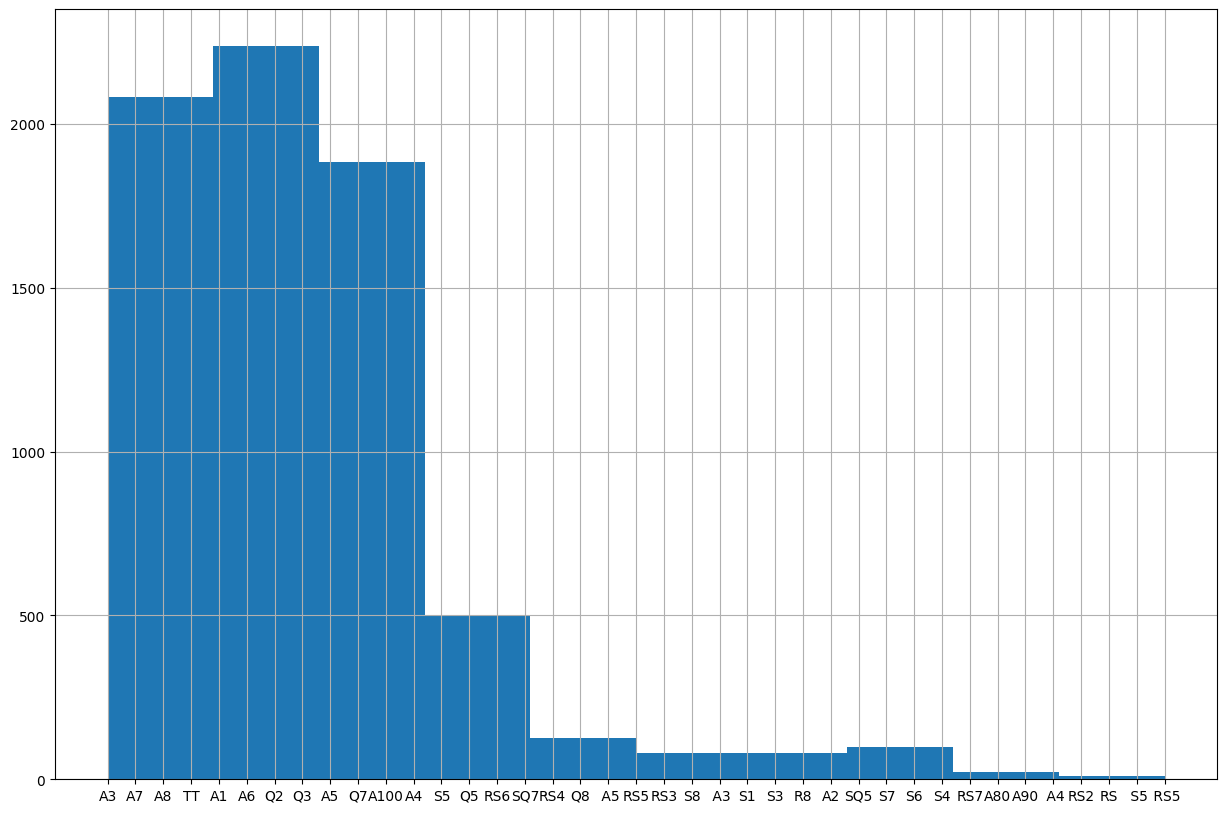

In [168]:
fig = plt.figure(figsize=(15,10))
df_train['car model'].hist()


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'price (euro)'}>,
        <Axes: title={'center': 'age (year)'}>],
       [<Axes: title={'center': 'mileage (km)'}>,
        <Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'Displacement'}>],
       [<Axes: title={'center': 'hp/litre'}>,
        <Axes: title={'center': 'km/year'}>, <Axes: >]], dtype=object)

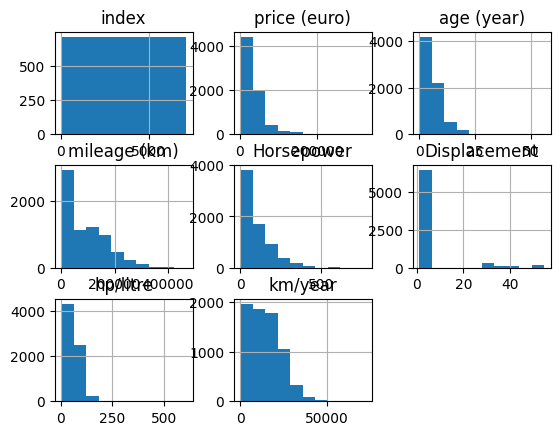

In [169]:
df_train.hist()

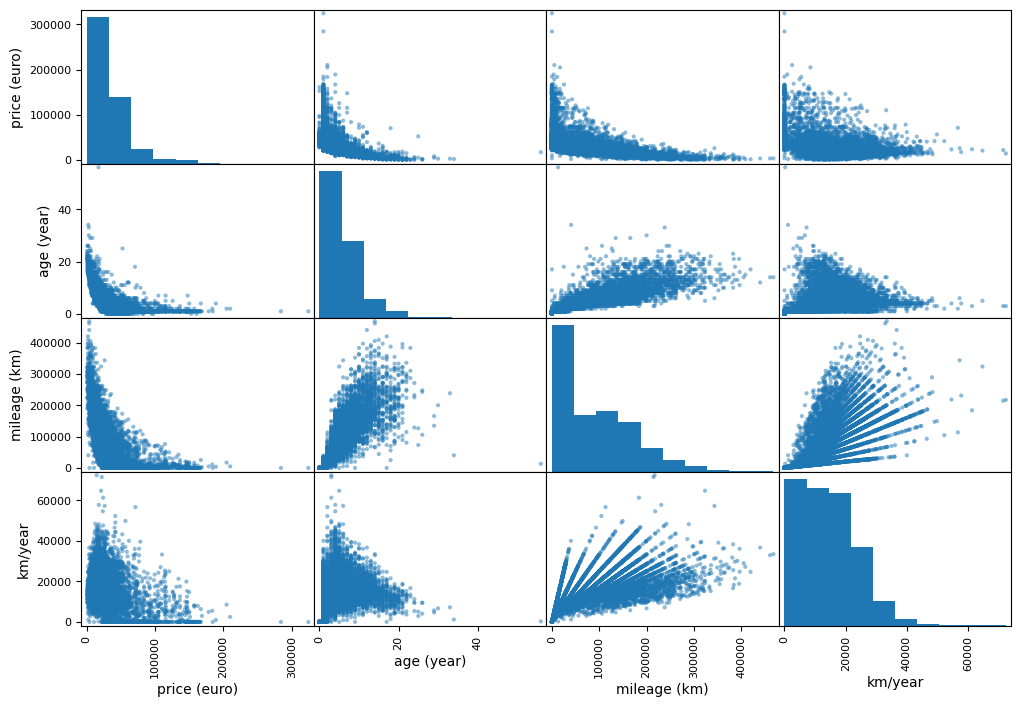

In [170]:
from pandas.plotting import scatter_matrix

attributes = ["price (euro)", "age (year)", "mileage (km)", "km/year"]
scatter_matrix(df_train[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()

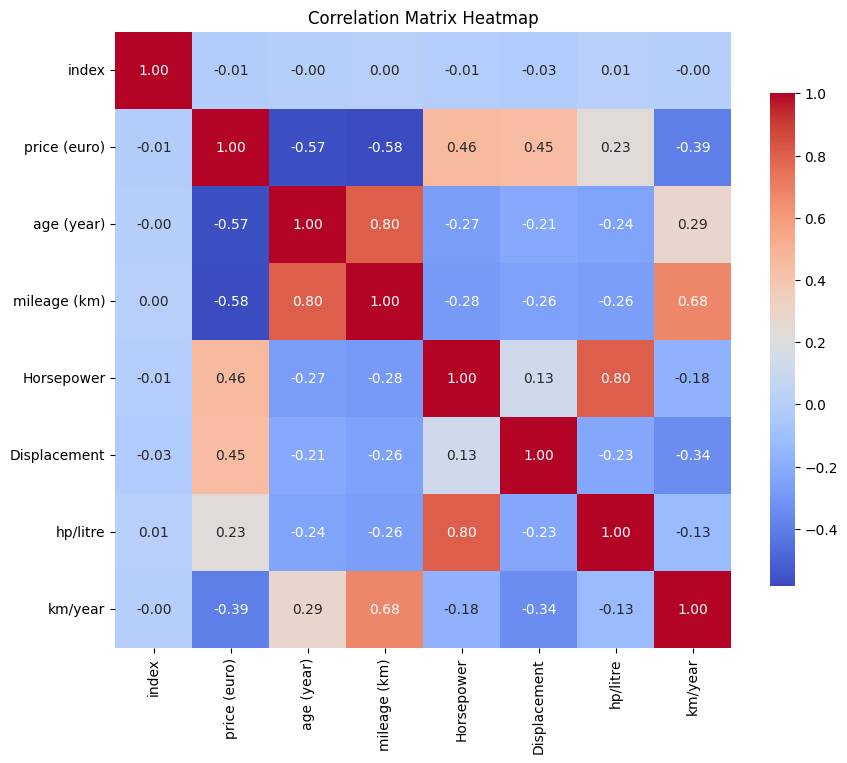

In [171]:
corr_matrix = df_train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap")
plt.show()

Text(0, 0.5, 'Average Price (euro)')

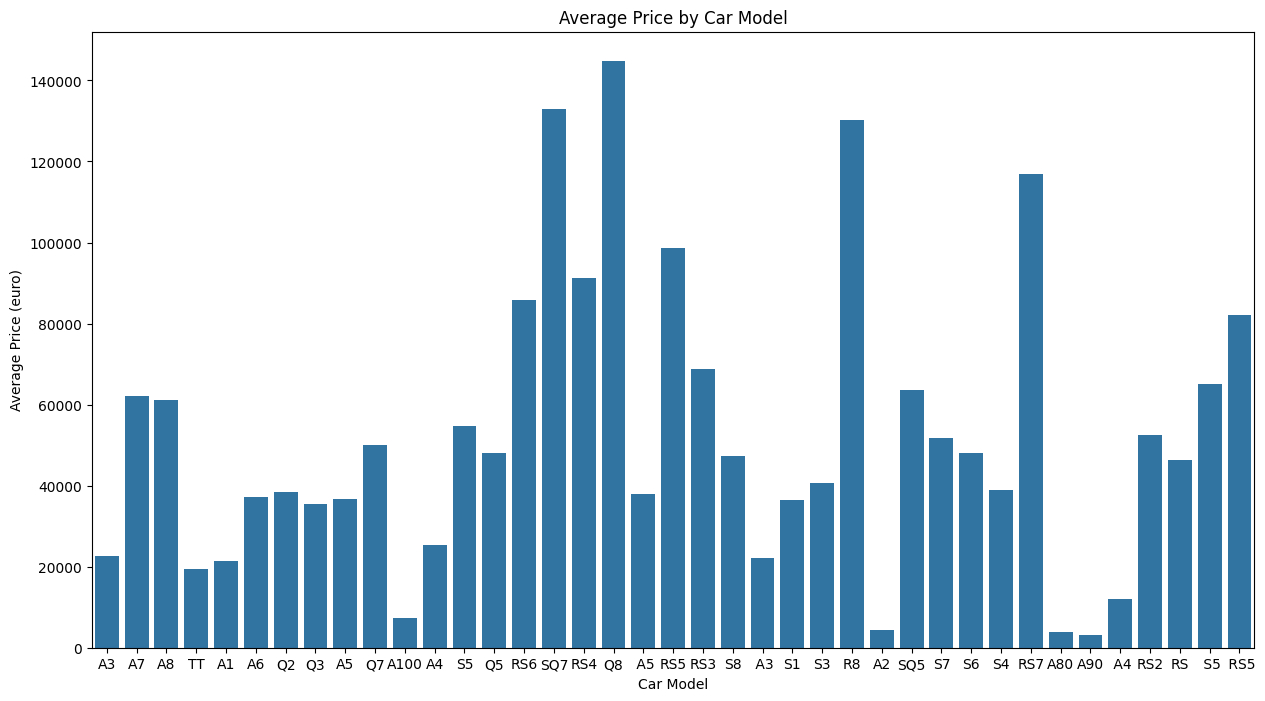

In [172]:
prijzen = []
for i in df_train["car model"].unique():
    df_prijs = df_train[df_train["car model"] == i]
    price = np.average(df_prijs["price (euro)"])
    prijzen.append(price)

plt.figure(figsize=(15, 8))
sns.barplot(x=df_train["car model"].unique(), y=prijzen)
plt.title("Average Price by Car Model")
plt.xlabel("Car Model")
plt.ylabel("Average Price (euro)")


In [173]:
missing_values = df_train[~df_train['car model'].isin(df_test['car model'])]['car model']
missing_values

df_train.drop(df_train[df_train['car model'].isin(missing_values)].index, inplace=True)

C:\Users\ericb\AppData\Local\Temp\ipykernel_27616\2148440932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(df_train[df_train['car model'].isin(missing_values)].index, inplace=True)


In [174]:

print(df_train["car model"].nunique())

32


In [ ]:
df_dummy = pd.get_dummies(df_train)


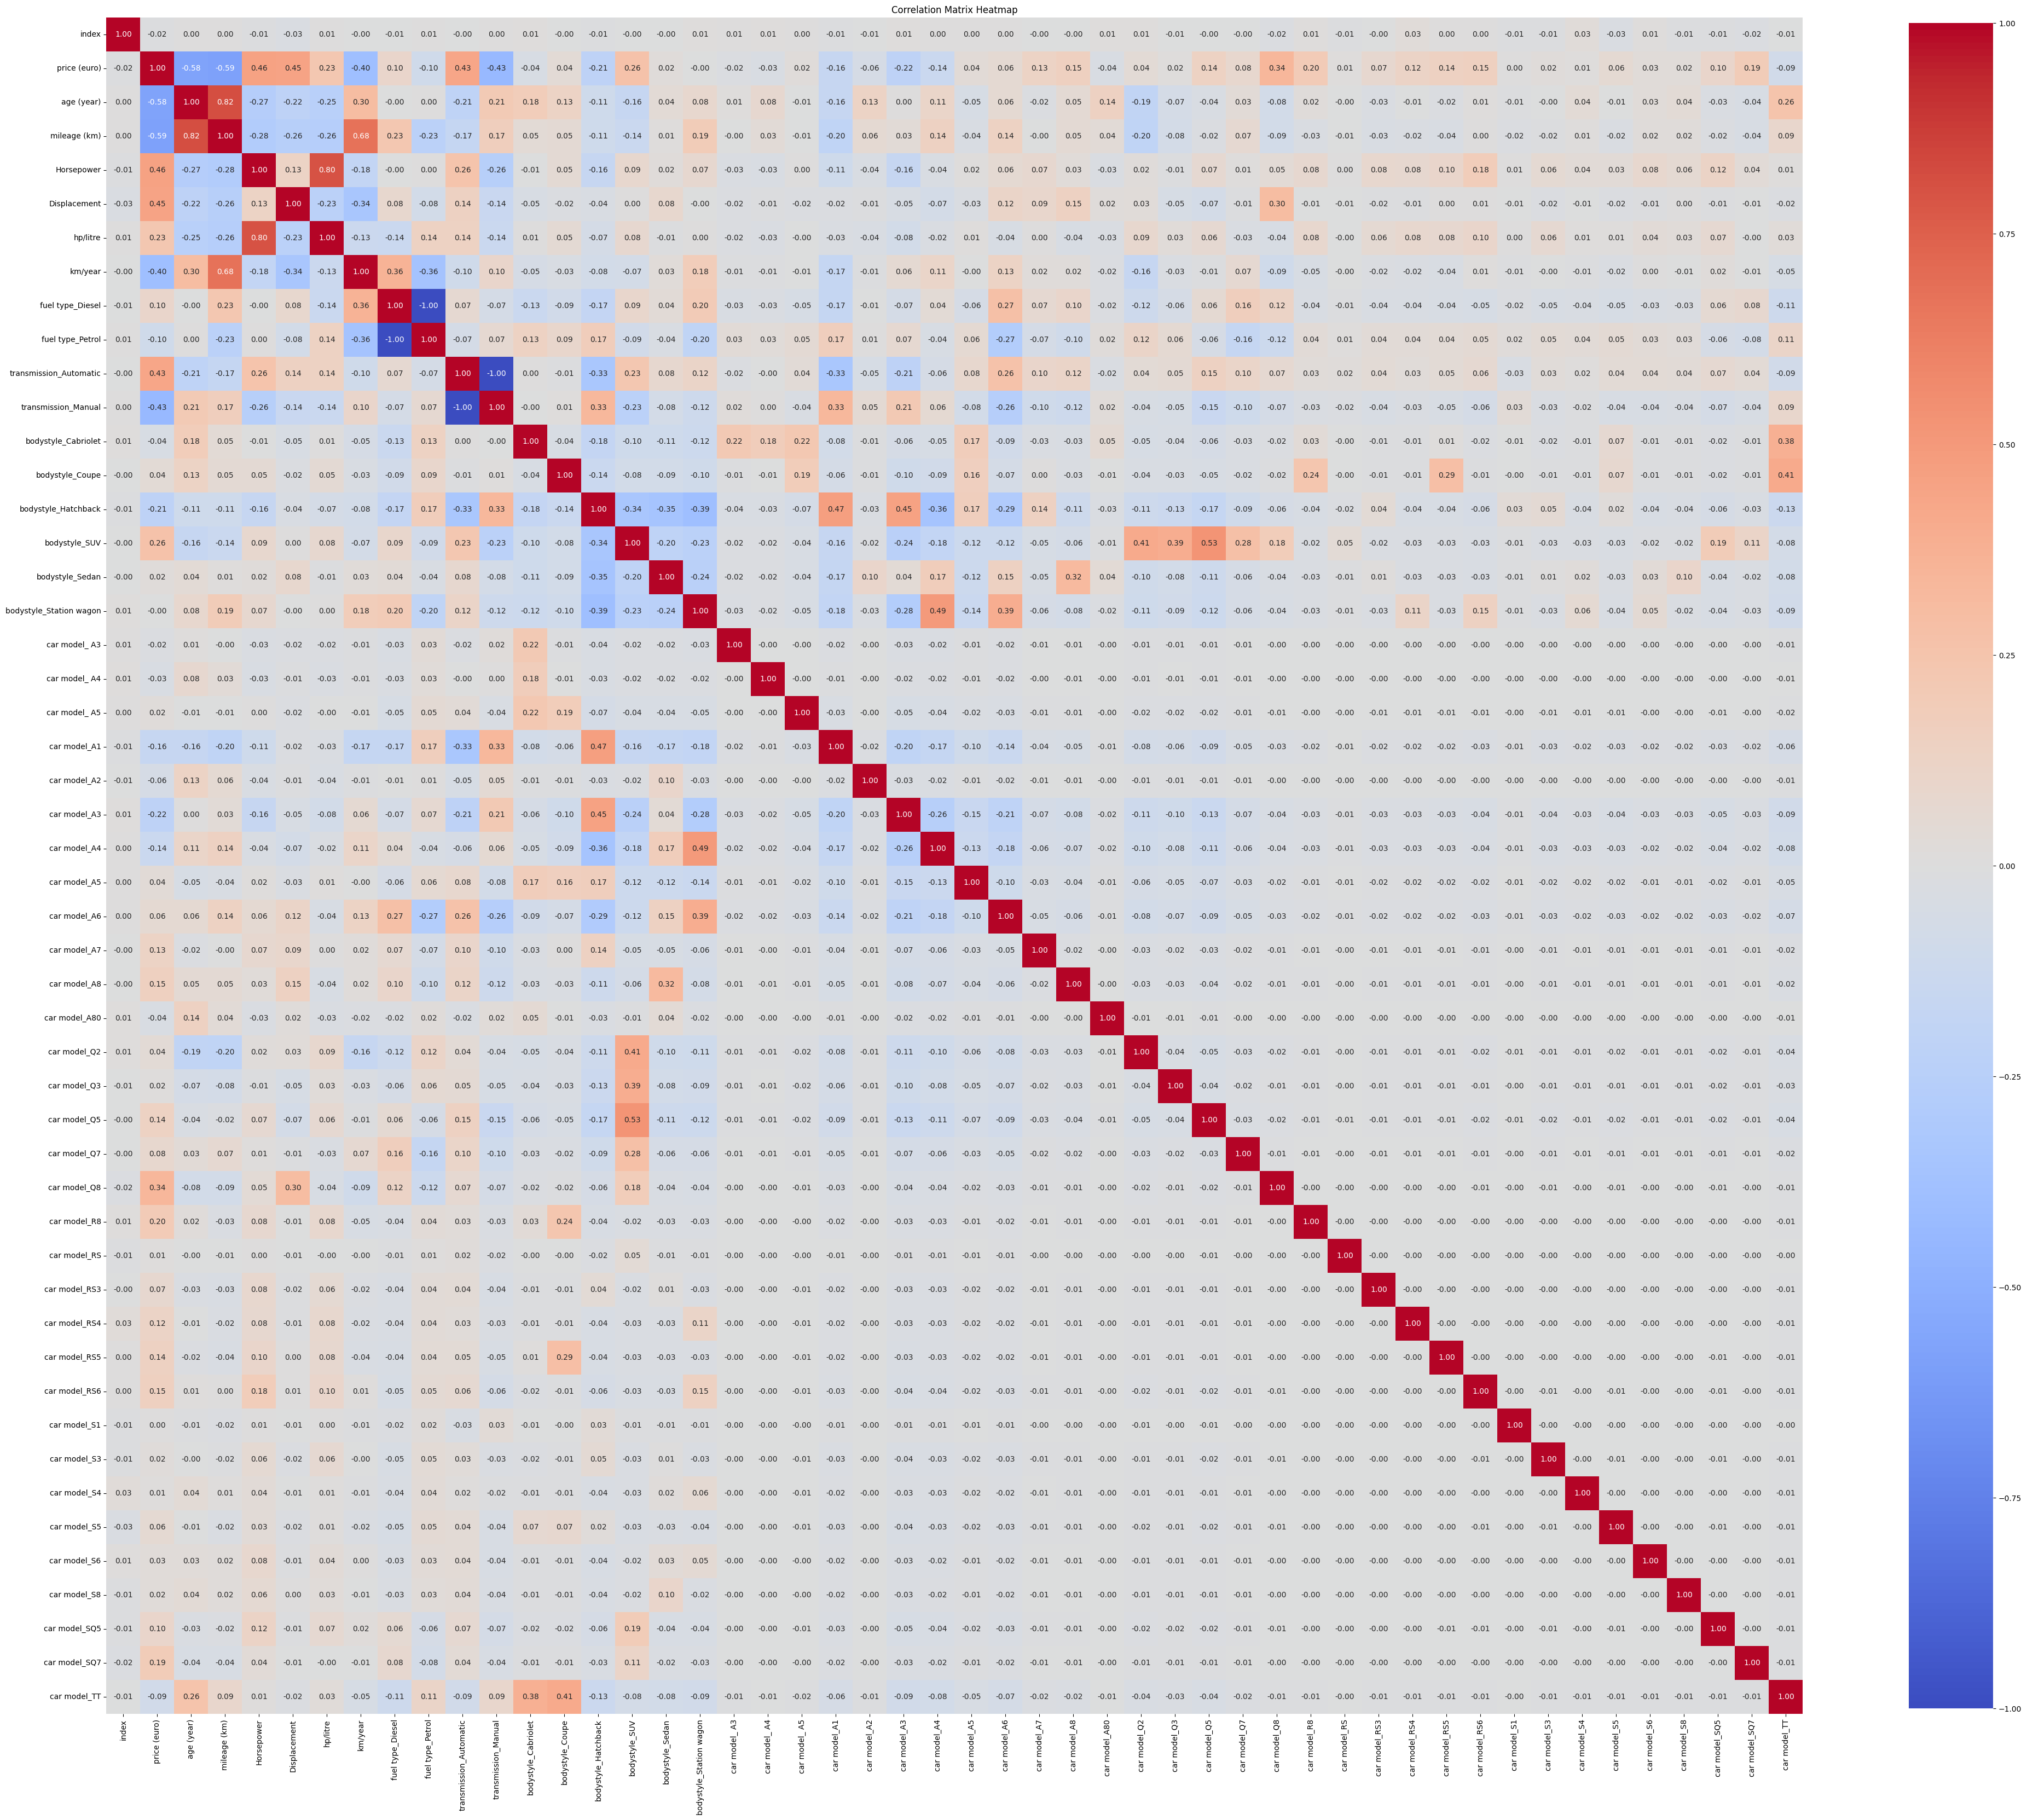

In [176]:
corr_matrix = df_dummy.corr(numeric_only=True)

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [177]:
abs(corr_matrix["price (euro)"].sort_values(ascending=True))

mileage (km)               0.585268
age (year)                 0.576875
transmission_Manual        0.433463
km/year                    0.396173
car model_A3               0.216140
bodystyle_Hatchback        0.212962
car model_A1               0.158715
car model_A4               0.137217
fuel type_Petrol           0.095513
car model_TT               0.087216
car model_A2               0.055592
bodystyle_Cabriolet        0.040774
car model_A80              0.036600
car model_ A4              0.032336
car model_ A3              0.020515
index                      0.015185
bodystyle_Station wagon    0.001830
car model_S1               0.003264
car model_RS               0.010046
car model_S4               0.012002
car model_Q3               0.015348
car model_ A5              0.016332
car model_S3               0.019103
bodystyle_Sedan            0.019222
car model_S8               0.024109
car model_S6               0.028673
car model_A5               0.035552
car model_Q2               0

In [ ]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

X_train, X_test, y_train, y_test = train_test_split(df_dummy.drop(columns='price (euro)'),
                                                    df_dummy["price (euro)"],  test_size=0.2, random_state=42)



# # cols =["mileage (km)"]
# # for col in cols:
# #     Q1 = X_train[col].quantile(0.25)
# #     Q3 = X_train[col].quantile(0.75)
# #     IQR = Q3 - Q1

# #     lower = Q1 - 1.5 * IQR
# #     upper = Q3 + 1.5 * IQR

# #     X_train = X_train[(X_train[col] >= lower) & (X_train[col] <= upper)]
# #     y_train = y_train[X_train.index]

# #Q1 = y_train.quantile(0.25)
# #Q3 = y_train.quantile(0.75)
# #IQR = Q3 - Q1

# # lower = Q1 - 1.5 * IQR
# # upper = Q3 + 1.5 * IQR


# # y_train = y_train[(y_train >= lower) & (y_train <= upper)]
# # X_train = X_train[y_train.index]
# X_outliers = X_train[['age (year)', 'mileage (km)']]

# z = stats.zscore(X_outliers)
# threshold = 3
# outliers_high = X_train[z > threshold]
# outliers_low = X_train[z < -threshold]
# outliers_high.info()
# outliers_low.info()
# df_clean = X_train[(z < threshold).all(axis=1) & (z > -threshold).all(axis=1)]
# X_train = df_clean
# y_train = y_train[X_train.index]


min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)



Root Mean Squared Error: 11489.563319583762


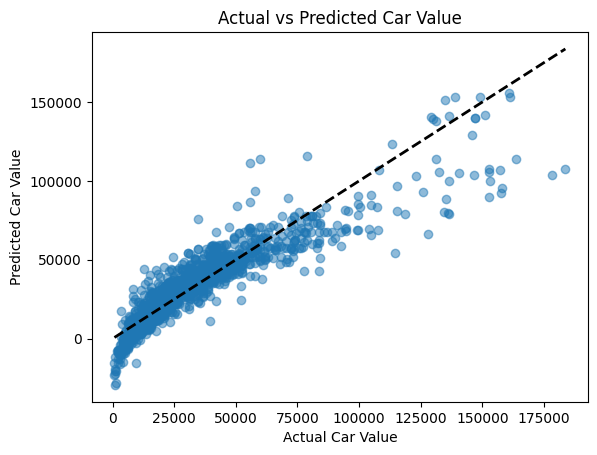

In [183]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error


lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Car Value")
plt.ylabel("Predicted Car Value")
plt.title("Actual vs Predicted Car Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [184]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 50.0, 200.0, 500.0, 1000.0, 5000.0, 10000.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Root Mean Squared Error: {rmse_ridge}")



Ridge Regression Root Mean Squared Error: 11486.189015064778


In [185]:
from math import nan
from lightgbm import LGBMRegressor
power_list = []

model = LGBMRegressor(
    n_estimators=60000,
    learning_rate=0.002,
    num_leaves=3000,
    max_depth=-1,
    min_child_samples=200,
    subsample=0.8,
    colsample_bytree=0.7,
    random_state=42,
    verbose=-1)

X_train_LGBM = X_train


min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_LGBM_scaled = min_max_scaler.fit_transform(X_train_LGBM)
X_test_scaled = min_max_scaler.transform(X_test)

# Train
model.fit(X_train_scaled, y_train)
# Predict on validation set
preds = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, preds)
print(f"Root Mean Squared Error: {rmse}")

c:\Users\ericb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 7235.489979969232


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1809142912.0000 - mae: 33061.1602 - val_loss: 1837262464.0000 - val_mae: 32987.8438
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1207553792.0000 - mae: 24231.8867 - val_loss: 725708608.0000 - val_mae: 18726.5059
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 637304512.0000 - mae: 17205.9141 - val_loss: 564482688.0000 - val_mae: 16184.8545
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 511451936.0000 - mae: 15209.0078 - val_loss: 457193984.0000 - val_mae: 14295.2256
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 433504224.0000 - mae: 13753.4951 - val_loss: 377023584.0000 - val_mae: 12612.5586
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 363472000.0000 - mae: 12408.9082 - val_loss: 300796608.0000 - val_mae: 11538.6543
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 294490848.0000 - mae: 11006.2061 - val_loss: 236304176.0000 - val_mae: 9935.0742
Epoc

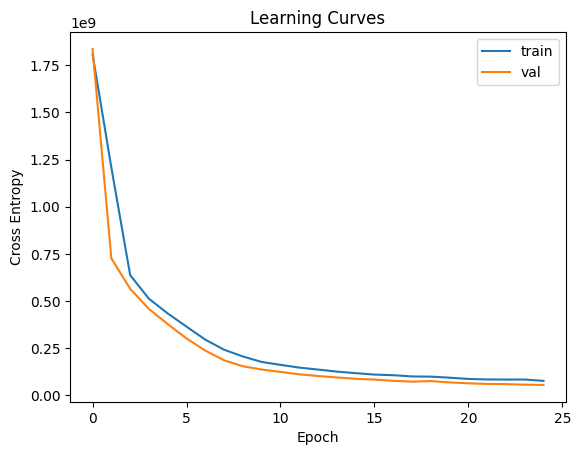

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78176200.0000 - mae: 5251.8022 - val_loss: 56025952.0000 - val_mae: 4297.5171
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72564360.0000 - mae: 5246.6367 - val_loss: 50263268.0000 - val_mae: 4245.0425
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74385952.0000 - mae: 5202.9609 - val_loss: 49481156.0000 - val_mae: 4150.9429
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70145120.0000 - mae: 5104.6123 - val_loss: 49151568.0000 - val_mae: 4088.2673
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75607320.0000 - mae: 5192.4746 - val_loss: 48556716.0000 - val_mae: 4114.0938
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73156040.0000 - mae: 5123.1455 - val_loss: 47797356.0000 - val_mae: 4078.1987
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70001552.0000 - mae: 5052.3379 - val_loss: 46779500.0000 - val_mae: 4006.9785
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━

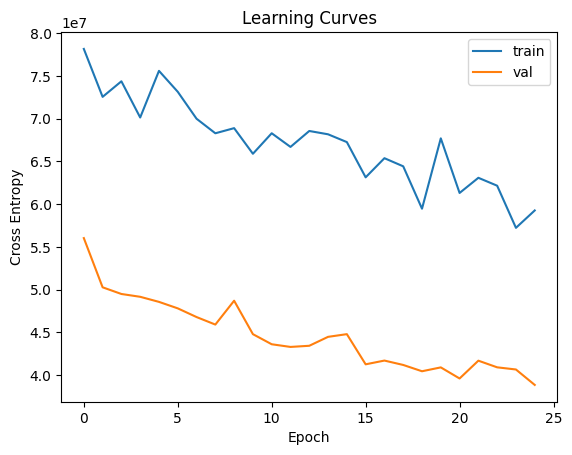

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58048196.0000 - mae: 4677.5215 - val_loss: 40796652.0000 - val_mae: 3731.1062
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60078532.0000 - mae: 4721.6211 - val_loss: 40292792.0000 - val_mae: 3693.9346
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62597836.0000 - mae: 4767.3867 - val_loss: 41592676.0000 - val_mae: 3717.7402
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59109568.0000 - mae: 4657.9609 - val_loss: 38114152.0000 - val_mae: 3660.9360
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57502396.0000 - mae: 4703.2617 - val_loss: 38119276.0000 - val_mae: 3692.7776
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59753572.0000 - mae: 4670.0029 - val_loss: 38429576.0000 - val_mae: 3672.8655
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59724864.0000 - mae: 4714.3901 - val_loss: 38817152.0000 - val_mae: 3684.7759
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━

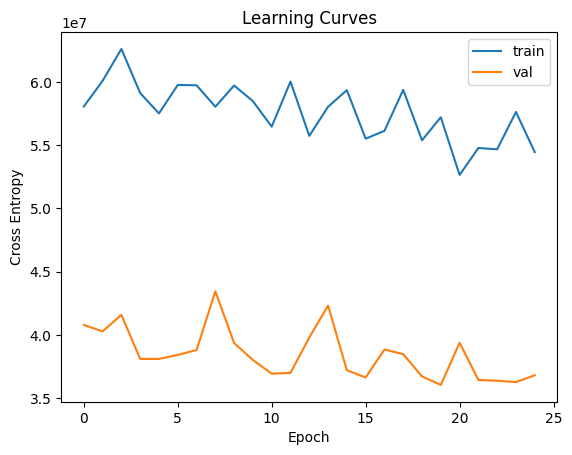

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55899392.0000 - mae: 4522.6685 - val_loss: 36537124.0000 - val_mae: 3593.6514
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56441520.0000 - mae: 4555.2300 - val_loss: 38147696.0000 - val_mae: 3618.8389
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61271236.0000 - mae: 4632.7651 - val_loss: 36053184.0000 - val_mae: 3629.5630
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55876552.0000 - mae: 4640.3628 - val_loss: 36130748.0000 - val_mae: 3608.2007
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53750068.0000 - mae: 4567.5498 - val_loss: 35474476.0000 - val_mae: 3667.3389
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55334316.0000 - mae: 4593.9595 - val_loss: 35620812.0000 - val_mae: 3619.3501
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55697888.0000 - mae: 4592.3638 - val_loss: 36563760.0000 - val_mae: 3573.8132
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━

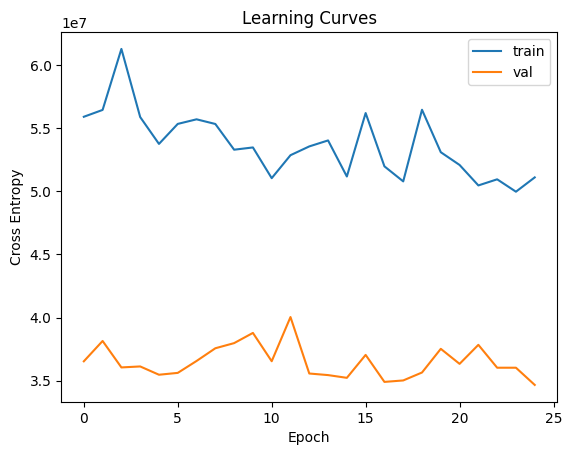

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53106376.0000 - mae: 4406.3032 - val_loss: 34878496.0000 - val_mae: 3678.9524
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50110708.0000 - mae: 4437.5830 - val_loss: 34979724.0000 - val_mae: 3570.6238
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53003860.0000 - mae: 4432.1724 - val_loss: 35240588.0000 - val_mae: 3545.6892
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50828472.0000 - mae: 4510.8306 - val_loss: 34743836.0000 - val_mae: 3596.1697
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47230760.0000 - mae: 4368.0933 - val_loss: 37398028.0000 - val_mae: 3577.1038
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52199760.0000 - mae: 4449.2773 - val_loss: 36014048.0000 - val_mae: 3596.7485
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50756552.0000 - mae: 4428.5620 - val_loss: 34361920.0000 - val_mae: 3659.6565
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━

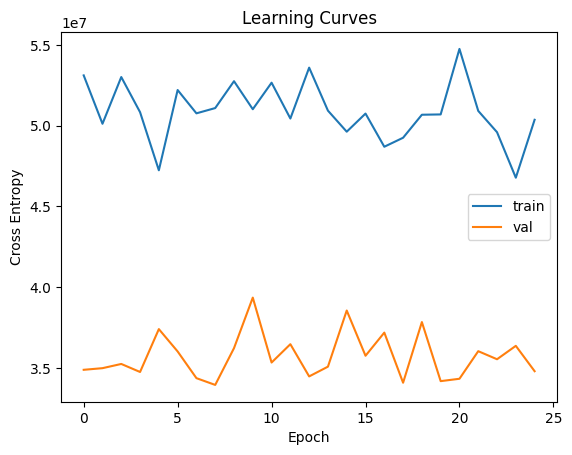

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50368804.0000 - mae: 4415.8672 - val_loss: 33907600.0000 - val_mae: 3508.0137
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51308524.0000 - mae: 4382.0020 - val_loss: 34782772.0000 - val_mae: 3513.8838
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47143404.0000 - mae: 4335.0205 - val_loss: 33797444.0000 - val_mae: 3654.8491
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47219032.0000 - mae: 4315.9385 - val_loss: 33596080.0000 - val_mae: 3559.6045
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52154344.0000 - mae: 4412.4834 - val_loss: 35730368.0000 - val_mae: 3544.3828
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50483572.0000 - mae: 4396.0156 - val_loss: 33464782.0000 - val_mae: 3573.3079
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47704100.0000 - mae: 4303.7725 - val_loss: 34219972.0000 - val_mae: 3551.4795
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━

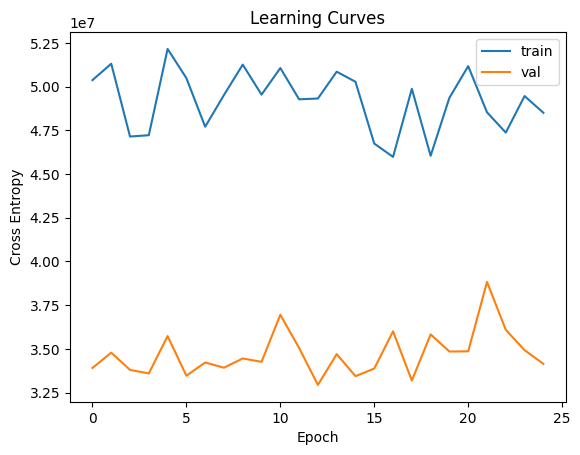

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47164852.0000 - mae: 4298.8569 - val_loss: 35466140.0000 - val_mae: 3520.7512
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48751772.0000 - mae: 4345.6323 - val_loss: 35579488.0000 - val_mae: 3515.3889
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48234128.0000 - mae: 4323.8501 - val_loss: 34616408.0000 - val_mae: 3503.7559
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51014604.0000 - mae: 4319.0898 - val_loss: 33881912.0000 - val_mae: 3536.0007
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47497016.0000 - mae: 4311.4395 - val_loss: 33268372.0000 - val_mae: 3533.7183
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46762296.0000 - mae: 4291.3940 - val_loss: 33067348.0000 - val_mae: 3487.3787
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46134732.0000 - mae: 4255.3447 - val_loss: 32639086.0000 - val_mae: 3481.8184
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━

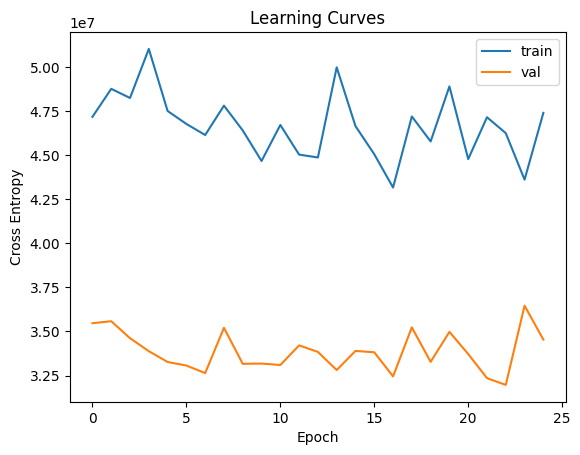

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45296272.0000 - mae: 4239.9224 - val_loss: 34378352.0000 - val_mae: 3485.7170
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46079812.0000 - mae: 4255.7031 - val_loss: 31885248.0000 - val_mae: 3416.8149
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45336216.0000 - mae: 4238.2017 - val_loss: 34071504.0000 - val_mae: 3467.7327
Epoch 4/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44161516.0000 - mae: 4162.2744 - val_loss: 31570772.0000 - val_mae: 3450.5088
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44692436.0000 - mae: 4173.1484 - val_loss: 32786330.0000 - val_mae: 3423.2280
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44221328.0000 - mae: 4178.2490 - val_loss: 31365092.0000 - val_mae: 3434.6489
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45911660.0000 - mae: 4287.1646 - val_loss: 39515892.0000 - val_mae: 3666.6985
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━

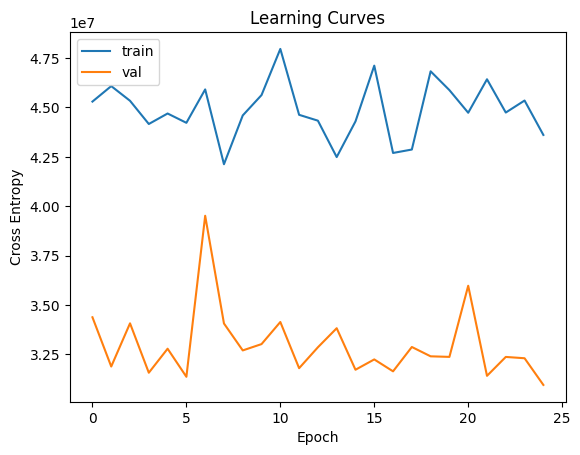

In [186]:
from pyexpat import model
from matplotlib.pyplot import hist
from scikeras.wrappers import KerasClassifier
input_shape = [X_train.shape[1]]

def create_model(learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1, activation='relu'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

model = create_model(learning_rate=0.0002)

# Train het model
for i in range(8):
    history = model.fit(X_train_scaled, y_train, epochs=25, validation_data=(X_test_scaled, y_test))
    y_pred = model.predict(X_test_scaled)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"Root Mean Squared Error: {rmse}")

    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.legend()
    plt.show()

# wrapped_model = KerasClassifier(model=create_model, epochs=50, verbose=1, learning_rate=0.001)
# param_grid = {'epochs': [10, 20, 30]}

# grid = GridSearchCV(estimator=wrapped_model, param_grid=param_grid, cv=2, scoring='neg_root_mean_squared_error')
# grid_result = grid.fit(X_train_scaled, y_train)

# Evalueer en voorspel

# best_parameters = grid_result.best_params_
# print(f"Best Parameters: {best_parameters}")
# mse = np.sqrt(grid_result.best_score_)
# print(f"Best MSE from Grid Search: {mse}")

#Bereken RMSE
# y_pred = model.predict(X_test_scaled)
# rmse = root_mean_squared_error(y_test, y_pred)
# print(f"Root Mean Squared Error: {rmse}")

# plt.title('Learning Curves')
# plt.xlabel('Epoch')
# plt.ylabel('Cross Entropy')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.legend()
# plt.show()


In [191]:
df_dummy_test = pd.get_dummies(df_test)
df_dummy_test.drop(columns=['price (euro)'], inplace=True)
df_test_scaled = min_max_scaler.transform(df_dummy_test)
y_pred = model.predict(df_test_scaled)
df_final = pd.DataFrame(y_pred, columns =['predicted price'], index=df_dummy_test.index)
df_final.to_csv('Datasets/audi_predictions.csv', index=False)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Iteration 1, loss = 6.74456531
Iteration 2, loss = 6.30041988
Iteration 3, loss = 6.12978219
Iteration 4, loss = 5.93053928
Iteration 5, loss = 5.67837871
Iteration 6, loss = 5.45758729
Iteration 7, loss = 5.28221385
Iteration 8, loss = 5.14285293
Iteration 9, loss = 5.03510536
Iteration 10, loss = 4.93700373
Iteration 11, loss = 4.86261604
Iteration 12, loss = 4.78753633
Iteration 13, loss = 4.69277503
Iteration 14, loss = 4.63825800
Iteration 15, loss = 4.59718023
Iteration 16, loss = 4.53506490
Iteration 17, loss = 4.46227603
Iteration 18, loss = 4.42143106
Iteration 19, loss = 4.37580340
Iteration 20, loss = 4.33838471
Iteration 21, loss = 4.31746465
Iteration 22, loss = 4.26339688
Iteration 23, loss = 4.23321048
Iteration 24, loss = 4.20760984
Iteration 25, loss = 4.17445708
Iteration 26, loss = 4.14141735
Iteration 27, loss = 4.11838480
Iteration 28, loss = 4.08895797
Iteration 29, loss = 4.07118073
Iteration 30, loss = 4.05075492
Iteration 31, loss = 4.02106055
Iteration 32, los

c:\Users\ericb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


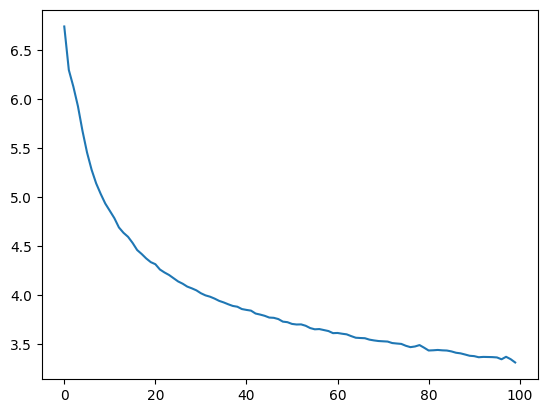

In [160]:

from sklearn.neural_network import MLPClassifier


input_shape = [X_train.shape[1]]

model = MLPClassifier(hidden_layer_sizes=(64, 32,16), activation='relu', solver='adam', max_iter=100,
                      learning_rate='constant', learning_rate_init=0.005, verbose=True)
# Schaal de data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


# Train het model

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")

plt.plot(model.loss_curve_)